In [1]:
!pip install -Uqq fastbook

     |████████████████████████████████| 727kB 6.3MB/s 
     |████████████████████████████████| 1.2MB 11.5MB/s 
     |████████████████████████████████| 51kB 8.9MB/s 
     |████████████████████████████████| 194kB 36.3MB/s 
     |████████████████████████████████| 61kB 9.9MB/s 


In [2]:
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [4]:
from fastbook import *
from fastai.vision.all import *

# Image Classification

In [6]:
path = untar_data(URLs.PETS)/'images'

def is_dog(x): return x[0].islower()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_dog, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.136206,0.027035,0.008119,00:49


epoch,train_loss,valid_loss,error_rate,time
0,0.052497,0.018969,0.007442,00:55


In [7]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

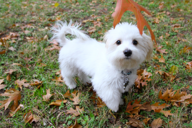

In [9]:
img = PILImage.create(uploader.data[0])
img.to_thumb(192)

In [11]:
is_dog,_,probs = learn.predict(img)
print(f"Is this a dog?: {is_dog}.")
print(f"Probability it's a dog: {probs[1].item():.6f}")

Is this a dog?: True.
Probability it's a dog: 0.999997


# Segmentation

In [12]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.584601,2.298192,00:01


epoch,train_loss,valid_loss,time
0,1.757928,1.472323,00:01
1,1.523198,1.281176,00:01
2,1.353161,1.105326,00:01
3,1.243356,1.066812,00:01
4,1.128333,0.911356,00:01
5,1.021441,0.884631,00:01
6,0.934476,0.835827,00:01
7,0.866949,0.836490,00:01


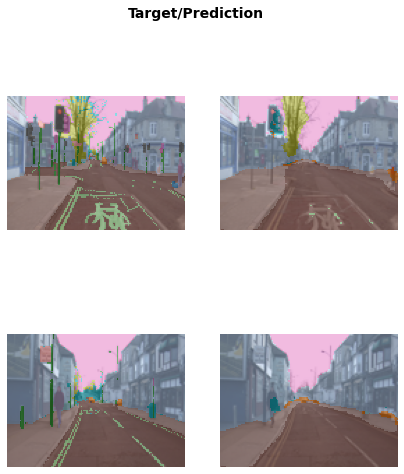

In [13]:
learn.show_results(max_n=6, figsize=(7,8))

# Text Classification

In [14]:
from fastai.text.all import *

In [15]:
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.469848,0.412311,0.814400,03:40


epoch,train_loss,valid_loss,accuracy,time
0,0.300474,0.326989,0.857080,07:08
1,0.241660,0.202467,0.921760,07:08
2,0.183062,0.190241,0.928760,07:09
3,0.145769,0.190072,0.929800,07:09


In [16]:
learn.predict("That movie was terrible!")

('neg', tensor(0), tensor([0.9885, 0.0115]))

In [17]:
learn.predict("I watched it and it was alright")

('pos', tensor(1), tensor([0.0019, 0.9981]))

# Tabular learner

In [18]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.365913,0.354791,0.838759,00:04
1,0.358522,0.341288,0.844134,00:04
2,0.334257,0.337300,0.846591,00:04


# Recommender System

In [19]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.504353,1.425383,00:00


epoch,train_loss,valid_loss,time
0,1.368014,1.369806,00:00
1,1.263635,1.196380,00:00
2,1.027143,0.892595,00:00
3,0.797115,0.750010,00:00
4,0.680604,0.717645,00:00
5,0.632648,0.707271,00:00
6,0.607484,0.702610,00:00
7,0.604573,0.700565,00:00
8,0.602423,0.699708,00:00
9,0.608211,0.699603,00:00


In [20]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,37.0,62.0,2.0,4.120996
1,80.0,69.0,4.5,3.861864
2,64.0,67.0,4.0,4.084572
3,65.0,92.0,4.5,4.224847
4,19.0,1.0,3.5,4.039250
5,7.0,38.0,5.0,4.010730
6,47.0,45.0,4.5,4.567978
7,99.0,26.0,3.5,4.055676
8,18.0,11.0,2.0,3.344899
